In [12]:
import sqlite3 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

sqlite_file = 'C:\\Users\harkos\Documents\Certificate in Data Science-UMD\Principles of Data Science\Board Games Final Project\\board-games-dataset\\database.sqlite'
conn = sqlite3.connect(sqlite_file)


In [13]:
query_BoardGames = "select * FROM BoardGames"
BoardGames = pd.read_sql(query_BoardGames, conn)

In [14]:
#print(BoardGames.head(5))
#These columns are not useful for analysis. So dropping all the mentioned columns.
df1 = BoardGames.drop(['details.image','details.description','game.type','details.thumbnail','stats.subtype.videogame.bayesaverage',
                     'stats.family.atarist.pos','stats.family.commodore64.bayesaverage','stats.family.commodore64.pos',
                     'stats.subtype.rpgitem.bayesaverage','stats.subtype.rpgitem.pos','stats.subtype.videogame.bayesaverage',
                     'stats.subtype.videogame.pos','stats.family.atarist.bayesaverage','stats.family.arcade.pos',
                     'stats.family.arcade.bayesaverage','stats.family.amiga.pos','stats.family.amiga.bayesaverage',
                     'polls.suggested_numplayers.Over','polls.suggested_playerage','polls.suggested_numplayers.9',
                     'polls.suggested_numplayers.8','polls.suggested_numplayers.7','polls.suggested_numplayers.6',
                     'polls.suggested_numplayers.5','polls.suggested_numplayers.5','polls.suggested_numplayers.4',
                     'polls.suggested_numplayers.3','polls.suggested_numplayers.2','polls.suggested_numplayers.1',
                     'polls.suggested_numplayers.10'], axis=1)
#df = df.dropna(axis=0, how="any")
print(df1.head(5))

  row_names game.id  details.maxplayers  details.maxplaytime  details.minage  \
0         1       1                 5.0                240.0            14.0   
1         2       2                 4.0                 30.0            12.0   
2         3       3                 4.0                 60.0            10.0   
3         4       4                 4.0                 60.0            12.0   
4         5       5                 6.0                 90.0            12.0   

   details.minplayers  details.minplaytime    details.name  \
0                 3.0                240.0      Die Macher   
1                 3.0                 30.0    Dragonmaster   
2                 2.0                 30.0         Samurai   
3                 2.0                 60.0  Tal der Könige   
4                 3.0                 90.0         Acquire   

   details.playingtime  details.yearpublished               ...                \
0                240.0                 1986.0               ...  

In [15]:
types_data = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = df1.select_dtypes(include=types_data)
#numdf = BoardGames.dropna(axis=0, how='any')
print(numdf.head(5))
numdf_variables = list(numdf)

   details.maxplayers  details.maxplaytime  details.minage  \
0                 5.0                240.0            14.0   
1                 4.0                 30.0            12.0   
2                 4.0                 60.0            10.0   
3                 4.0                 60.0            12.0   
4                 6.0                 90.0            12.0   

   details.minplayers  details.minplaytime  details.playingtime  \
0                 3.0                240.0                240.0   
1                 3.0                 30.0                 30.0   
2                 2.0                 30.0                 60.0   
3                 2.0                 60.0                 60.0   
4                 3.0                 90.0                 90.0   

   details.yearpublished  attributes.total  stats.average  \
0                 1986.0               6.0        7.66508   
1                 1981.0               7.0        6.60815   
2                 1998.0               6.

In [16]:
#Calculate outliers for all numeric details

for field in numdf_variables:
    value_mean = df1[field].median()
    value_q1 = df1[field].quantile(.25)
    value_q3 = df1[field].quantile(.75)
    value_qrange = value_q3-value_q1
    lower_outlier = value_q1-(4.5 * value_qrange)
    upper_outlier = value_q3+(4.5 * value_qrange)
    print(field)
    print(len(df1[df1[field]>upper_outlier]), 'upper outliers at', upper_outlier)
    print(len(df1[df1[field]<lower_outlier]), 'lower outliers at', lower_outlier)

details.maxplayers
1135 upper outliers at 24.0
0 lower outliers at -16.0
details.maxplaytime
1141 upper outliers at 307.5
0 lower outliers at -242.5
details.minage
4 upper outliers at 66.0
0 lower outliers at -54.0
details.minplayers
9803 upper outliers at 2.0
14126 lower outliers at 2.0
details.minplaytime
1158 upper outliers at 285.0
0 lower outliers at -215.0
details.playingtime
1141 upper outliers at 307.5
0 lower outliers at -242.5
details.yearpublished
0 upper outliers at 2129.0
8760 lower outliers at 1869.0
attributes.total
0 upper outliers at 15.0
0 lower outliers at -5.0
stats.average
0 upper outliers at 36.666685
0 lower outliers at -30.000014999999998
stats.averageweight
0 upper outliers at 9.625
0 lower outliers at -7.875
stats.bayesaverage
18063 upper outliers at 0.0
0 lower outliers at 0.0
stats.family.abstracts.bayesaverage
0 upper outliers at 8.35031
1 lower outliers at 3.2307099999999993
stats.family.abstracts.pos
0 upper outliers at 2572.0
0 lower outliers at -1713.0


stats.average                               1.000000
stats.family.childrensgames.bayesaverage    0.924828
stats.family.partygames.bayesaverage        0.922686
stats.family.cgs.bayesaverage               0.918290
stats.family.familygames.bayesaverage       0.839699
stats.family.abstracts.bayesaverage         0.789070
stats.family.thematic.bayesaverage          0.779206
stats.family.wargames.bayesaverage          0.754560
stats.family.strategygames.bayesaverage     0.698975
stats.stddev                                0.573593
stats.averageweight                         0.511930
stats.subtype.boardgame.bayesaverage        0.509892
attributes.total                            0.396274
stats.bayesaverage                          0.387759
details.minage                              0.238825
details.yearpublished                       0.192503
stats.wanting                               0.186248
stats.trading                               0.168297
stats.wishing                               0.

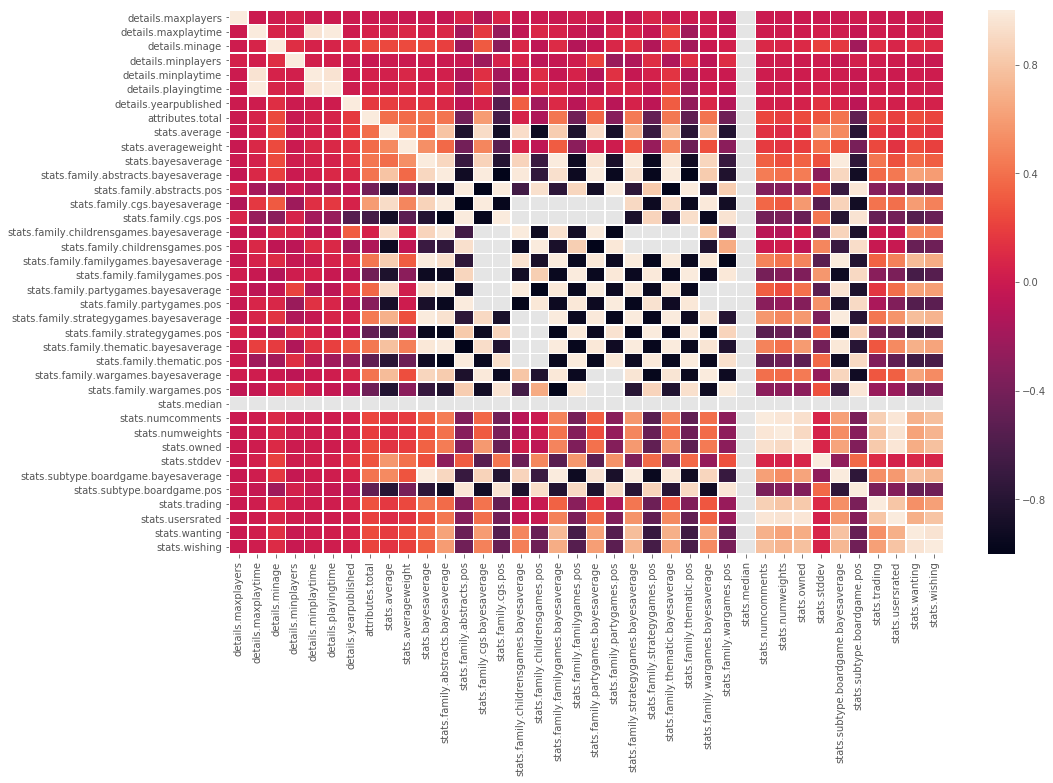

In [17]:
#Correlation Matrix
fig, ax = plt.subplots(figsize=(16,10))
corr = df1.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
corr['stats.average'].sort_values(ascending=False)

In [18]:
#Let's make a new dataframe to work on categorizing the boardgame correctly
#New manageable data frame. 
df_category = df1.loc[:, ['game.id','attributes.boardgamecategory']]
df_category['attributes.boardgamecategory'] = df_category['attributes.boardgamecategory'].fillna("None")
#Use comma splits to break out individual mechanical types
df_category = df_category['attributes.boardgamecategory'].apply(lambda x: pd.Series(x.split(',')))
#Sum the rows to determine most popular category types
category_counts = df_category.apply(pd.Series.value_counts).fillna(0)
category_counts['Total'] = category_counts.sum(axis=1)
#This gives the most popular games in the dataset; 
category_counts = category_counts.sort_values(by='Total', ascending=False)
category_list = category_counts[category_counts['Total']>500].index.tolist()
#Create dummies for all the boardgame categories
df1['attributes.boardgamecategory'].fillna(0, inplace=True)

In [19]:
for i in category_list:
    df1.loc[df1['attributes.boardgamecategory'].str.contains(i) == True ,i] = 1
    df1.loc[df1['attributes.boardgamecategory'].str.contains(i) == False ,i] = 0
    df1[i].fillna(0, inplace=True)

In [20]:
#Create a dataframe that takes boardgame categories and sorts by their overall mean rating
#Renaissance game type has the most average ratings
d =[]
for i in category_list:
    score = df1[df1[i]==1]['stats.average'].mean()
    d.append({'Avg_Rating': score, 'Game Type': i})
df_categorymean = pd.DataFrame(d).sort_values(by='Avg_Rating', ascending=False)
df_categorymean[:10]

,Avg_Rating,Game Type
69,6.447312,Renaissance
3,6.281217,Expansion for Base-game
58,6.035445,Civilization
19,5.789767,World War II
63,5.743018,World War I
27,5.722487,Medieval
7,5.711969,Miniatures
46,5.710972,City Building
51,5.677852,Napoleonic
47,5.604465,Trains


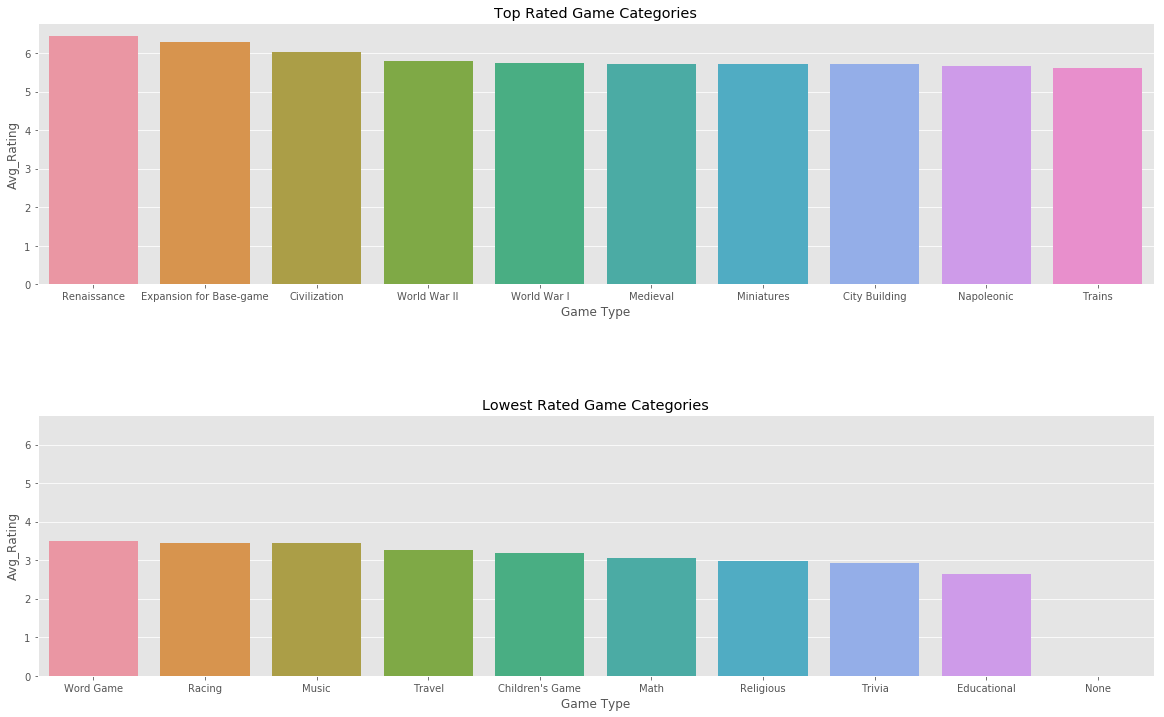

In [21]:
#Create base of subplot chart.. rows x columbs = graphs
#Bar plots are constructed with the game types on x-axis and average rating on y-axis. Although the ratings are not too different,
#it clearly shows the Renaissance game type has highest rating.
#The second graph also shows the lowest rated games. 
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, sharex=False, figsize=(20,12))
fig.subplots_adjust(hspace=.5)

sns.barplot(x="Game Type", y="Avg_Rating", data=df_categorymean[:10], ax=ax1)
sns.barplot(x="Game Type", y="Avg_Rating", data=df_categorymean[-10:], ax=ax2)
ax1.title.set_text('Top Rated Game Categories')
ax2.title.set_text('Lowest Rated Game Categories')